In [16]:
import mne
import matplotlib.pyplot as plt

## Reading XDF EEG data

In [38]:
from utilities import read_xdf

# For Interact-UI, recommended run in .py file.
raw = read_xdf("omz1.xdf", show_plot=False, show_psd=False) 

Creating RawArray with float64 data, n_channels=8, n_times=46130
    Range : 0 ... 46129 =      0.000 ...   184.463 secs
Ready.


c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\utilities.py:29: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\utilities.py:30: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\utilities.py:31: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\utilities.py:32: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\utilities.py:33: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has changed from NA to V.
  raw.set_channel_t

### Plot show EEG data & PSD (overview)

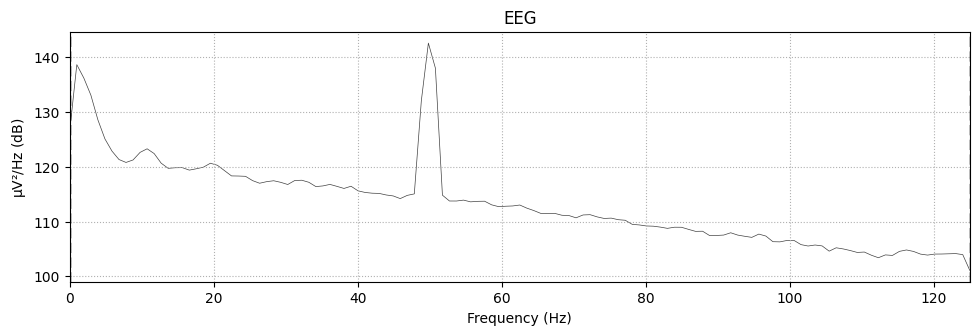

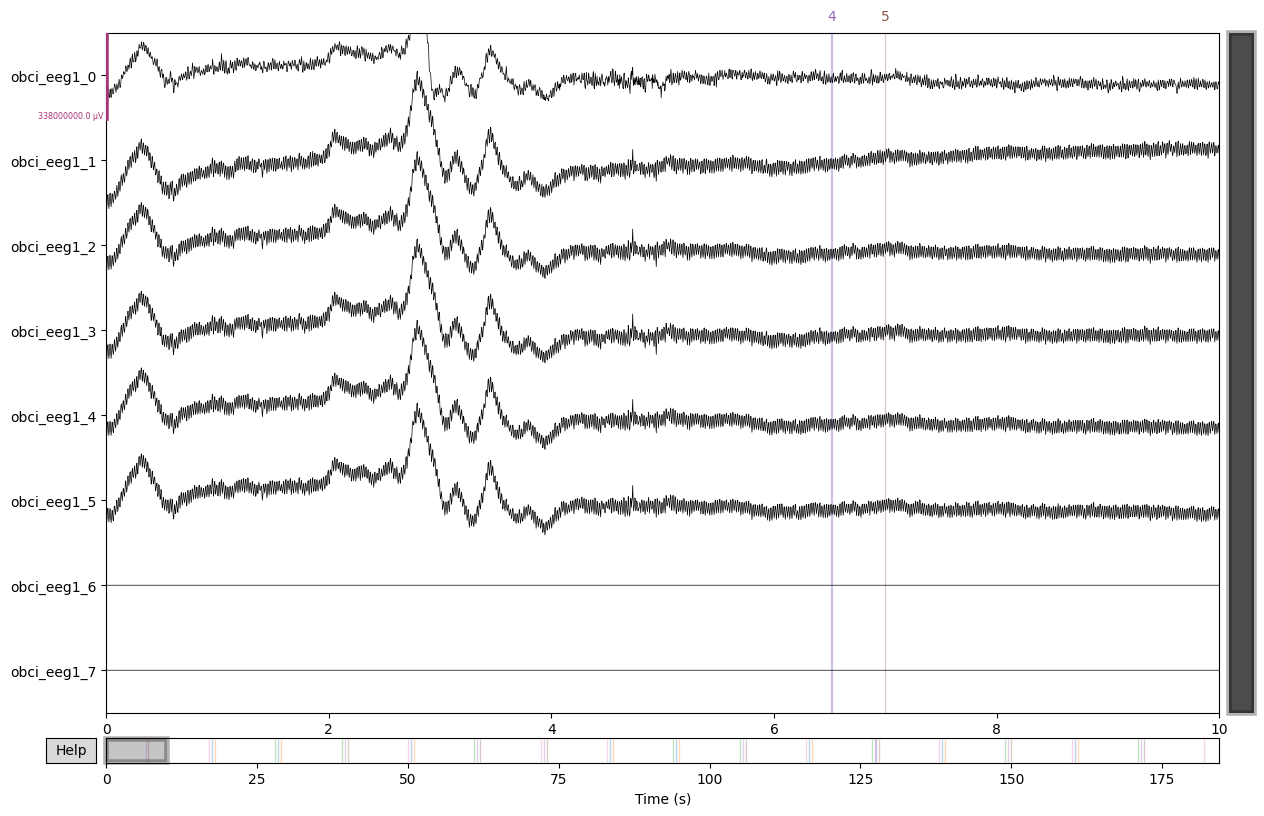

Effective window size : 1.024 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\seami\AppData\Local\Temp\ipykernel_13300\847192129.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(
c:\Users\seami\AppData\Local\Programs\Python\Python39\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


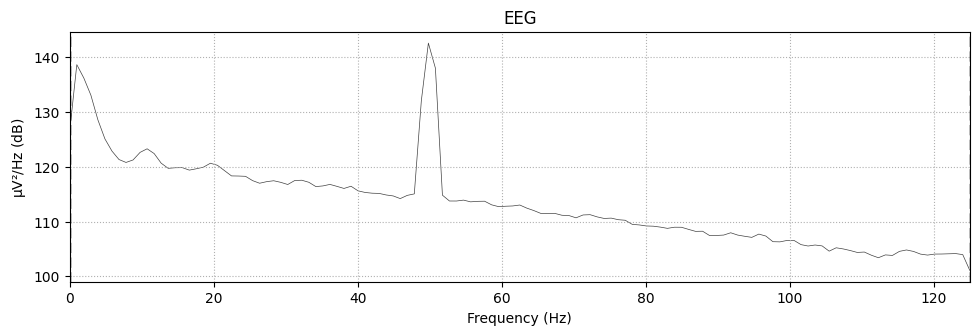

In [12]:
raw.plot(
    duration=10, 
    start=0.0, 
    scalings=169, # You may edit scalings value later
    )
raw.compute_psd(
    picks='obci_eeg1_1',    # pick by channel name
    # picks='eeg',          # pick by channel type
    ).plot()


### Event handle

In [29]:
print(raw.annotations)
# print(raw.annotations.onset[0])

<Annotations | 48 segments: 1 (8), 2 (8), 3 (8), 4 (8), 5 (8), 6 (8)>


**Our project event (annotations) types** (this information is not standardized)

1 : *Left cue start*

2 : *Left stimuli start*

3 : *Left blank start*

4 : *Right cue start*

5 : *Right stimuli start*

6 : *Right blank start*

In [83]:
annotations_des = {
    '1': 'Left cue start',
    '2': 'Left stimuli start',
    '3': 'Left blank start',
    '4': 'Right cue start',
    '5': 'Right stimuli start',
    '6': 'Right blank start',
}
raw_eeg = raw.pick_channels([ # Pick only Pz, POz, O1, Oz, O2
    'obci_eeg1_1',
    'obci_eeg1_2',
    'obci_eeg1_3',
    'obci_eeg1_4',
    'obci_eeg1_5',
])
# Read Event from annotations
events, event_dict = mne.events_from_annotations(raw_eeg)
print('Total events:', len(events))
# print(event_dict)
# print(events[:5])

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Total events: 48


### Epoching

In [84]:
# Split Epochs (Trials)
epochs = mne.Epochs(raw_eeg, events, 
        tmin=0,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=10,    # final timestamp (10 means set epoch duration 10 second)
        baseline=(0, 0),
        preload=True,
    )

Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 2502 original time points ...
1 bad epochs dropped


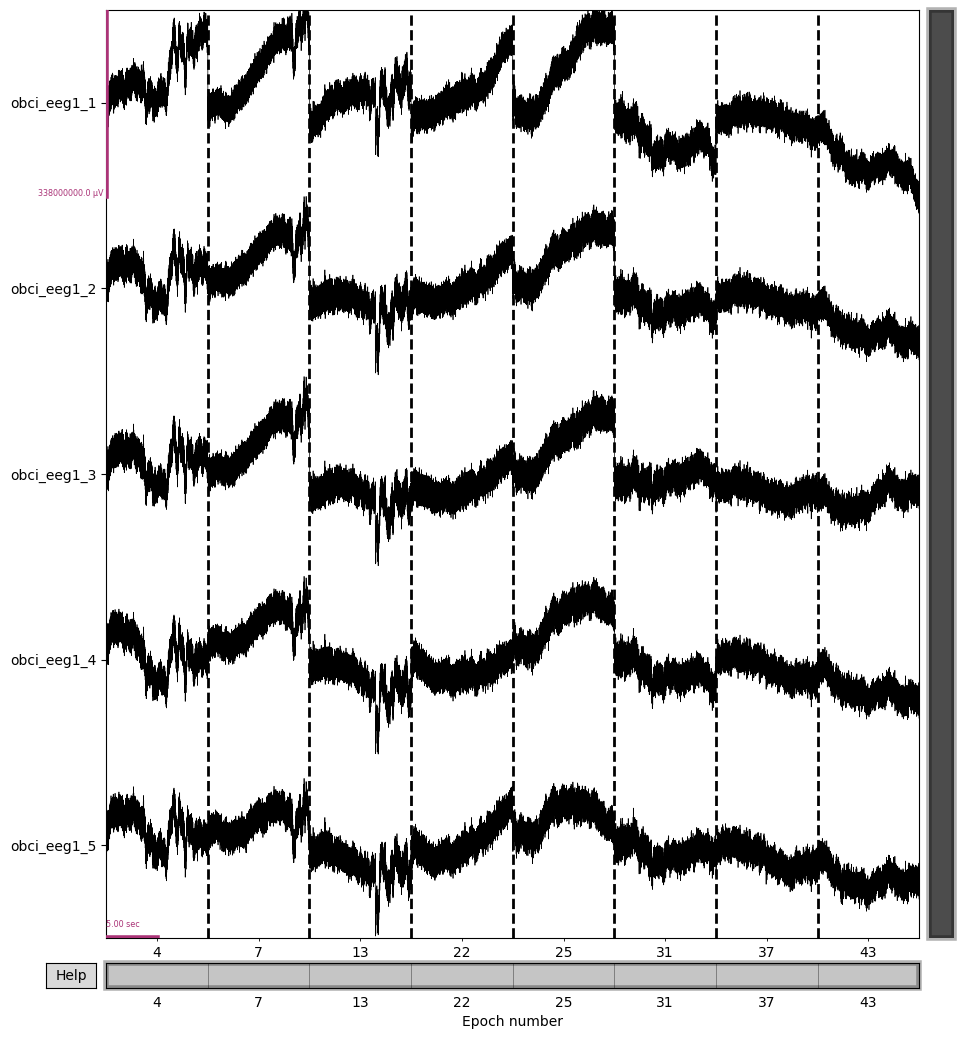

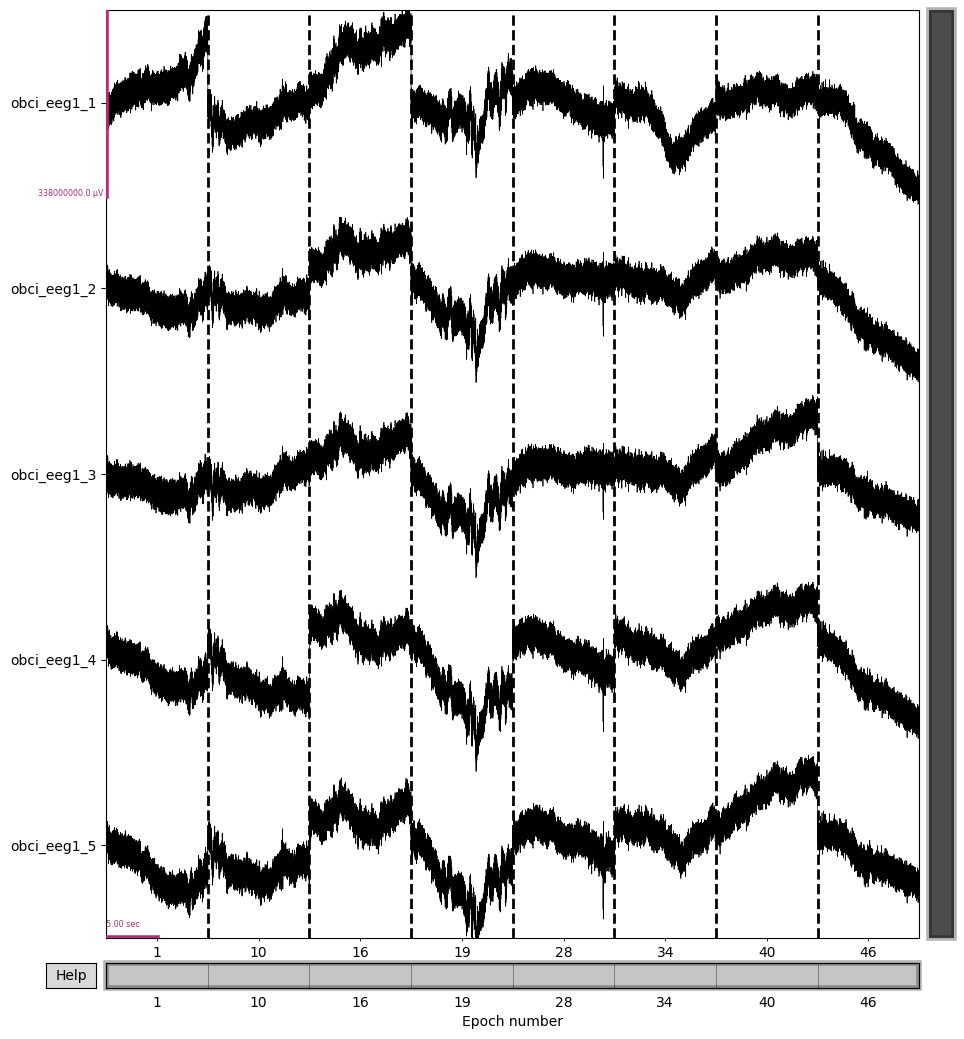

In [86]:
# Preview EEG split by epoch
epochs['2'].plot(
    scalings=169, # You may edit scalings value later
    title='Left stimuli start',
)
epochs['5'].plot(
    scalings=169, # You may edit scalings value later
    title='Right stimuli start',
)
plt.show()

### Plot PSD of Left-Right stimuli

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\seami\AppData\Local\Programs\Python\Python39\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


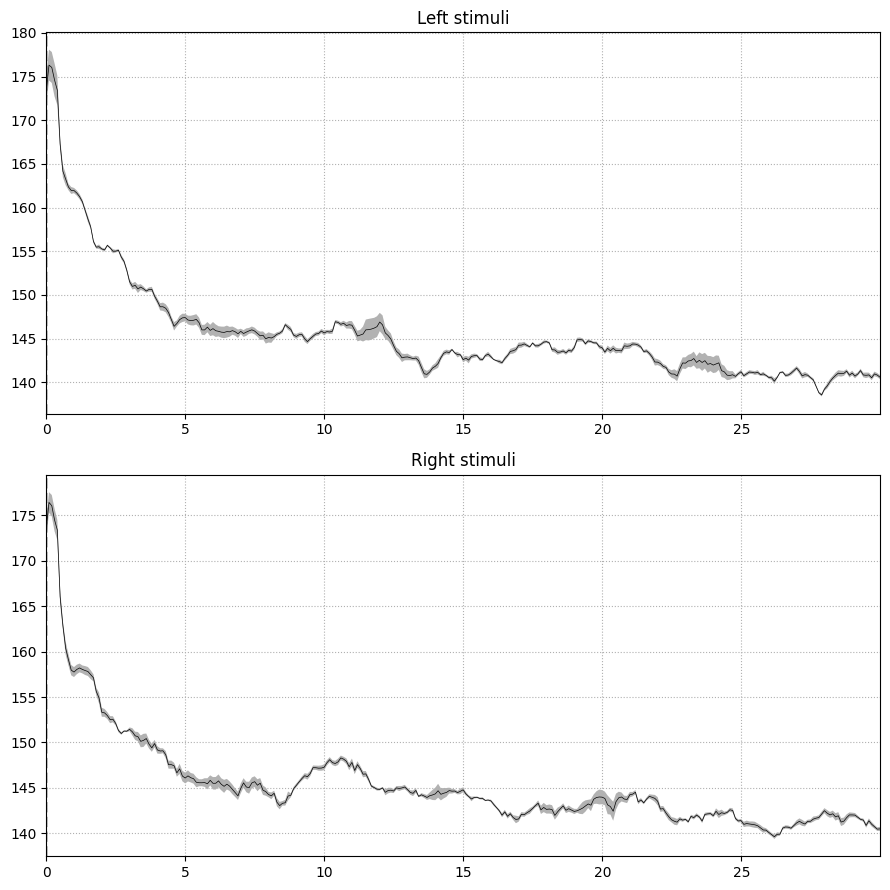

In [87]:
fig, ax = plt.subplots(2, figsize=(9,9))

epochs['2'].compute_psd(
    fmax=30,                    
    ).plot(
        axes=ax[0],
        average=True,
        )
ax[0].set_title('Left stimuli')

epochs['5'].compute_psd(
    fmax=30,                    
    ).plot(
        axes=ax[1],
        average=True,
        )
ax[1].set_title('Right stimuli')

plt.tight_layout()
plt.show()